<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/dz_20_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install pandas

In [1]:
# Импорт используемых библиотек
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Загрузка данных
df = sns.load_dataset('titanic')

# Предобработка данных
# заменяем значения True и False на 1 и 0
data['alone'] = df['alone'].replace({True: 1, False: 0})
# заменяем значения yes и no на 1 и 0
data['alive'] = df['alive'].replace({'yes': 1, 'no': 0})

# Разделение на целевую переменную и показатели
X = data.drop(columns='survived')
y = data["survived"]

In [45]:
# задаем границы интервалов
bins = [0, 100, 200, float('inf')]

# разбиваем значения на интервалы и сохраняем результат в новую колонку 'interval'
df['fare_bins'] = pd.cut(df['fare'], bins=bins, labels=['0-100', '100-200', '200+'])

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,bins,fare_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(-0.001, 7.854]",0-100
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(39.688, 512.329]",0-100
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(7.854, 10.5]",0-100
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(39.688, 512.329]",0-100
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(7.854, 10.5]",0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,"(10.5, 21.679]",0-100
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(21.679, 39.688]",0-100
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,"(21.679, 39.688]",0-100
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(21.679, 39.688]",0-100


In [43]:
# считаем количество уникальных значений в колонке 'column1' и сортируем результат по возрастанию
value_counts = df['bins'].value_counts().sort_index()

# выводим результат в формате "значение: количество"
for value, count in value_counts.items():
    print(f"{value}: {count}")

(-0.001, 7.854]: 179
(7.854, 10.5]: 184
(10.5, 21.679]: 172
(21.679, 39.688]: 180
(39.688, 512.329]: 176


In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(-0.001, 7.854]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(39.688, 512.329]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(7.854, 10.5]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(39.688, 512.329]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(7.854, 10.5]"


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    int64   
 14  alone        891 non-null    int64   
dtypes: bool(1), category(2), float64(2), int64(6), object(4)
memory usage: 86.7+ KB


**Сколько строк в датафрейме, сколько столбцов
Сколько места занимает датафрейм в оперативной памяти**

In [18]:
# Вывод информации о датасете
print(f'Информация о датасете: \n {X.shape[0]}: строк\n {X.shape[1]}: столбцов\n '
      f'{np.round(data.memory_usage(index=True).sum() / 1024, 4)} КБ: занимаемый объем памяти')

Информация о датасете: 
 891: строк
 14: столбцов
 86.7432 КБ: занимаемый объем памяти


**Для каждой категориальной переменной рассчитать моду и сколько раз мода встречается в данных**

In [19]:
# Выбираем только интервальные переменные (столбцы с числовыми значениями)
num_cols = ['age', 'fare']
num_data = data[num_cols]

# Рассчитываем основные характеристики для каждой переменной
stats_df = num_data.describe().T

# Выводим результат
print(stats_df)

      count       mean        std   min      25%      50%   75%       max
age   714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
fare  891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292


**Для каждой категориальной переменной рассчитать моду и сколько раз мода встречается в данных**

In [20]:
# Создаем DataFrame, содержащий только категориальные переменные
cat_cols = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
cat_data = data[cat_cols]

# Рассчитываем моду и количество ее встреч для каждой переменной
mode_df = pd.DataFrame({'mode': cat_data.mode().iloc[0], 'count': cat_data.apply(lambda x: x.value_counts().max())})

# Выводим результат
print(mode_df)


                    mode  count
survived               0    549
pclass                 3    491
sex                 male    577
sibsp                  0    608
parch                  0    678
embarked               S    644
class              Third    491
who                  man    537
adult_male          True    537
deck                   C     59
embark_town  Southampton    644
alive                  0    549
alone                  1    537


In [21]:
# Анализ пропусков
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
# Заполнение пропущенных значений в столбце 'age' медианным значением
data['age'].fillna(data['age'].median(), inplace=True)

# Заполнение пропущенных значений в столбце 'embarked' наиболее часто встречающимся значением
embarked_mode = data['embarked'].mode()[0]
data['embarked'].fillna(embarked_mode, inplace=True)

# Сначала получим текущие категории
current_categories = data['deck'].cat.categories.tolist()
# Добавим новую категорию 'Unknown' в список категорий, если она еще не существует
if 'Unknown' not in current_categories:
  new_categories = current_categories + ['Unknown']
else:
  new_categories = current_categories
# Установим обновленные категории в переменную 'deck'
data['deck'] = data['deck'].cat.set_categories(new_categories)

# Заполнение пропущенных значений в столбце 'deck' значением Unknown
data.loc[data['deck'].isnull(), 'deck'] = 'Unknown'

# Заполнение пропущенных значений в столбце 'embark_town' значением Unknown
data["embark_town"].fillna("Unknown", inplace=True)

In [23]:
# Анализ пропусков
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

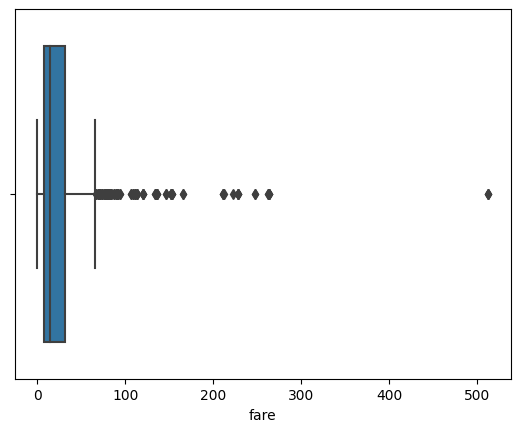

In [24]:
# fare: стоимость билета.
sns.boxplot(x=data["fare"])
plt.show()


In [25]:
# sibsp: количество братьев/сестер и/или супругов на борту.
# parch: количество родителей/детей на борту
# alone: указывает, был ли пассажир на борту один или нет
# embarked: порт, в котором пассажир сел на борт Титаника.
X = X.drop(['sibsp', 'parch', 'alone', 'embarked'], axis=1)

In [28]:
X

,pclass,sex,age,fare,class,who,adult_male,deck,embark_town,alive
0,3,male,22.0,7.2500,Third,man,True,NaN,Southampton,0
1,1,female,38.0,71.2833,First,woman,False,C,Cherbourg,1
2,3,female,26.0,7.9250,Third,woman,False,NaN,Southampton,1
3,1,female,35.0,53.1000,First,woman,False,C,Southampton,1
4,3,male,35.0,8.0500,Third,man,True,NaN,Southampton,0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,Second,man,True,NaN,Southampton,0
887,1,female,19.0,30.0000,First,woman,False,B,Southampton,1
888,3,female,NaN,23.4500,Third,woman,False,NaN,Southampton,0
889,1,male,26.0,30.0000,First,man,True,C,Cherbourg,1


In [ ]:
# class: класс каюты, в которой находился пассажир
# sns.boxplot(x=data["class"])
# plt.show()

In [ ]:
def calculate_iv(data, feature, target):
  # Создание таблицы сопряженности
  cross_tab = pd.crosstab(data[feature], data[target])
  # Расчет долей исходов в каждой группе
  cross_tab['total'] = cross_tab.sum(axis=1)
  cross_tab['event_rate'] = cross_tab[1] / cross_tab['total']

  # Расчет долей исходов в общей выборке
  total_event = cross_tab[1].sum()
  total_non_event = cross_tab[0].sum()
  total = total_event + total_non_event
  overall_event_rate = total_event / total
  # Расчет IV
  cross_tab['woe'] = np.log(cross_tab['event_rate'] / overall_event_rate)
  cross_tab['iv'] = cross_tab['woe'] * (cross_tab['event_rate'] - overall_event_rate)

  # Суммирование IV по всем группам
  iv = cross_tab['iv'].sum()
  return iv

In [ ]:
# Расчет IV для каждой переменной
for col in data.columns:
    if col != 'survived': # целевая переменная
        iv = calculate_iv(data, col, 'survived')
        print('Information Value for', col, ':', iv)

Information Value for pclass : 0.20524781407892229
Information Value for sex : 0.374315741124665
Information Value for age : inf
Information Value for sibsp : inf
Information Value for parch : inf
Information Value for fare : inf
Information Value for embarked : 0.06780467333205424
Information Value for class : 0.20524781407892229
Information Value for who : 0.5289233444351997
Information Value for adult_male : 0.39595617295010777
Information Value for deck : 1.0068341846899365
Information Value for embark_town : 0.6583398625703771
Information Value for alive : inf
Information Value for alone : 0.05242155397132103


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
